# Project Name: Food Waste Management System

##### **Project Type**    - SQL / Data Analysis
##### **Contribution**    - Individual
##### **Member       - Puneeth Sai Satvik**

### Project Summary

Food Waste Management System is an SQL-based project that enables to manage food wastage problem efficiently by providing those in need like NGOs and Orphanages with non-expired left over food from supermarkets, restaurants, etc. It also has Streamlit application with UI for anyone to interact with

The project primarily has four datasets to work with:
* Providers: The list of entities providing the food (Ex: Restaurant, Supermarket, etc.)
* Receivers: The list of entities receiving the food (Ex: NGOs)
* Food Listing: The table of all the foods listed by the provider
* Claims: The table that contains records of food claimed by receiver including status

There are four main phases of this project they are

#### Data Preparation

This involves loading the datasets into the memory, understanding them by establishing relationships between tables, searching for duplicates and null values. If found, enable an efficient way to handle them to finally produce clean dataset to work with during further phases.

From the given data, there are no null values or duplicates found, hence the original dataset is fully clean and ready for the next stage.

#### Database Creation

In this phase, MySQL is installed and deployed at port no 3306 of my local system. Once it is up and running, a framework called mysql.connector is installed to access the database using python for efficient automation. Connection is established by entering the port no and password. After the connection is setup, a cursor is defined which is then used to create the database, tables and insert values into those tables. Insertion is then perfomed with exception handling to catch any improper data.

Now the database and the tables in they are fully ready for in-depth analysis

#### Data Analysis

Data analysis aims to uncover any insights in data using select queries and graphical representations. Fifteen important questions were answered in this phase they are

1. How many food providers and receivers are there in each city?
2. Which type of food provider (restaurant, grocery store, etc.) contributes the most food?
3. What is the contact information of food providers in a specific city?
4. Which receivers have claimed the most food?
5. What is the total quantity of food available from all providers?
6. Which city has the highest number of food listings?
7. What are the most commonly available food types?
8. How many food claims have been made for each food item?
9. Which provider has had the highest number of successful food claims?
10. What percentage of food claims are completed vs. pending vs. canceled?
11. What is the average quantity of food claimed per receiver?
12. Which meal type (breakfast, lunch, dinner, snacks) is claimed the most?
13. What is the total quantity of food donated by each provider?
14. Which food items have the highest unclaimed rate?
15. How many unique food items does each provider contribute?

Graphs were also plotted for some queries for a better understanding

#### Streamlit Application

The final Phase of the project is the streamlit application, which is a user-friendly application whose aim is to manage the data and check for insights with a non-code-based interface. It has five main pages they are
* About Project - The first page of the application that is static and displays the information about the project and guides user on how to use the application.
* View Tables - The page where user can see the data of all the tables in the database it uses select queries to fetch data from the database.
* CRUD Operations - This page is mainly for the application admin who can insert, update and delete records from all the tables with a simple UI and tested of various test cases with irregular and corrupted data.
* P & R Filters - The page where users can search for the contact of receivers and providers based on city and ID.
* 15 Queries - The queries mentioned before with graphs are added in this page where user can select using a dropdown on the type of data they look for. It get continuously updated as it performs select option every time user toggles between the dropdown of queries. Hence, working simultaneously with CRUD operation page.


### GitHub Link

### Data Preparation

In [1]:
# Essential Imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data

providers = pd.read_csv("providers_data.csv")
receivers = pd.read_csv("receivers_data.csv")
food_listings = pd.read_csv("food_listings_data.csv")
claims = pd.read_csv("claims_data.csv")

#### Dataset First View

In [3]:
# Dataset 1 First Look

providers.head()

,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577


In [4]:
# Dataset 2 First Look

receivers.head()

,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570
2,3,Ashley Mckee,NGO,South Randalltown,691-023-0094x856
3,4,Erika Rose,NGO,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,067.491.0154


In [5]:
# Dataset 3 First Look

food_listings.head()

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner


In [6]:
# Dataset 4 First Look

claims.head()

,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17


#### Dataset Rows and Columns

In [7]:
# Dataset 1 Shape

providers.shape

(1000, 6)

In [8]:
# Dataset 2 Shape

receivers.shape

(1000, 5)

In [9]:
# Dataset 3 Shape

food_listings.shape

(1000, 9)

In [10]:
# Dataset 4 Shape

claims.shape

(1000, 5)

#### Duplicate Values

In [11]:
# Dataset 1 duplicate values

providers.duplicated().sum()

np.int64(0)

In [12]:
# Dataset 2 duplicate values

receivers.duplicated().sum()

np.int64(0)

In [13]:
# Dataset 3 duplicate values

food_listings.duplicated().sum()

np.int64(0)

In [14]:
# Dataset 4 duplicate values

claims.duplicated().sum()

np.int64(0)

#### Null Values

In [15]:
# Dataset 1 Null Values

providers.isnull().sum()

Provider_ID    0
Name           0
Type           0
Address        0
City           0
Contact        0
dtype: int64

In [16]:
# Dataset 2 Null Values

receivers.isnull().sum()

Receiver_ID    0
Name           0
Type           0
City           0
Contact        0
dtype: int64

In [17]:
# Dataset 3 Null Values

food_listings.isnull().sum()

Food_ID          0
Food_Name        0
Quantity         0
Expiry_Date      0
Provider_ID      0
Provider_Type    0
Location         0
Food_Type        0
Meal_Type        0
dtype: int64

In [18]:
# Dataset 4 Null Values

claims.isnull().sum()

Claim_ID       0
Food_ID        0
Receiver_ID    0
Status         0
Timestamp      0
dtype: int64

### Database Creation

In [19]:
# Essential Imports
import mysql.connector

In [20]:
# MySQL connection setup
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Aries@123"
)

In [21]:
# Define the cursor
cursor = conn.cursor()

In [22]:
# Create the database
cursor.execute("CREATE DATABASE IF NOT EXISTS FOOD")

In [23]:
# Use the database
cursor.execute("USE FOOD")

#### Create Tables

In [24]:
# Create provider table

cursor.execute("""
    CREATE TABLE IF NOT EXISTS providers (
        Provider_ID INT PRIMARY KEY,
        Name VARCHAR(255),
        Type VARCHAR(100),
        Address TEXT,
        City VARCHAR(100),
        Contact VARCHAR(50)
    );
""")
conn.commit()

In [25]:
# Create receiver table

cursor.execute("""
    CREATE TABLE IF NOT EXISTS receivers (
        Receiver_ID INT PRIMARY KEY,
        Name VARCHAR(255),
        Type VARCHAR(100),
        City VARCHAR(100),
        Contact VARCHAR(50)
    );
""")
conn.commit()

In [26]:
# Create food listing table

cursor.execute("""
    CREATE TABLE IF NOT EXISTS food_listings (
        Food_ID INT PRIMARY KEY,
        Food_Name VARCHAR(255),
        Quantity INT,
        Expiry_Date DATE,
        Provider_ID INT,
        Provider_Type VARCHAR(100),
        Location VARCHAR(100),
        Food_Type VARCHAR(100),
        Meal_Type VARCHAR(100),

        FOREIGN KEY (Provider_ID) REFERENCES providers(Provider_ID)
    );
""")
conn.commit()

In [27]:
# Create claims Table

cursor.execute("""
    CREATE TABLE IF NOT EXISTS claims (
        Claim_ID INT PRIMARY KEY,
        Food_ID INT,
        Receiver_ID INT,
        Status VARCHAR(100),
        Timestamp DATETIME,

        FOREIGN KEY (Food_ID) REFERENCES food_listings(Food_ID),
        FOREIGN KEY (Receiver_ID) REFERENCES receivers(Receiver_ID)
    );
""")
conn.commit()

#### Insert Data Into Tables

In [28]:
for index, row in providers.iterrows():
    try:
        cursor.execute("""
            INSERT INTO providers (Provider_ID, Name, Type, Address, City, Contact)
            VALUES (%s, %s, %s, %s, %s, %s)
        """, tuple(row))

    # Exception is used to prevent error when same records are inserted again
    except Exception as e:
        print(f"Unexpected error inserting into Providers Table")
        break

conn.commit()


Unexpected error inserting into Providers Table


In [29]:
# Insert into receivers
for index, row in receivers.iterrows():
    try:
        cursor.execute("""
            INSERT INTO receivers (Receiver_ID, Name, Type, City, Contact)
            VALUES (%s, %s, %s, %s, %s)
        """, tuple(row))

    # Exception is used to prevent error when same records are inserted again
    except Exception as e:
        print(f"Unexpected error inserting into Receivers Table")
        break

conn.commit()

Unexpected error inserting into Receivers Table


In [30]:
# Insert into food listings
from datetime import datetime

for index, row in food_listings.iterrows():
    try:
        # Convert Expiry_Date to YYYY-MM-DD
        if isinstance(row['Expiry_Date'], str):
            row['Expiry_Date'] = datetime.strptime(row['Expiry_Date'], "%m/%d/%Y").date()

        cursor.execute("""
            INSERT INTO food_listings
            (Food_ID, Food_Name, Quantity, Expiry_Date, Provider_ID, Provider_Type, Location, Food_Type, Meal_Type)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
        """, tuple(row))

    # Exception is used to prevent error when same records are inserted again
    except Exception as e:
        print(f"Unexpected error inserting into Food Listings table")
        break

conn.commit()


Unexpected error inserting into Food Listings table


In [31]:
# Insert into claim

from datetime import datetime

for index, row in claims.iterrows():
    try:
        if isinstance(row['Timestamp'], str):
            row['Timestamp'] = datetime.strptime(row['Timestamp'], "%m/%d/%Y %H:%M")

        cursor.execute("""
            INSERT INTO claims (Claim_ID, Food_ID, Receiver_ID, Status, Timestamp)
            VALUES (%s, %s, %s, %s, %s)
        """, tuple(row))

    # Exception is used to prevent error when same records are inserted again
    except Exception as e:
        print(f"Unexpected error inserting into Claims Table")
        break

conn.commit()

Unexpected error inserting into Claims Table


### Data Analysis

#### Query 1

In [32]:
# SQL Queries

# 1) How many food providers and receivers are there in each city?

query1_1 = "Select City, count(*) as Provider_Count from providers group by City order by Provider_Count desc;"
query1_2 = "Select City, count(*) as Receiver_Count from receivers group by City order by Receiver_Count desc;"

cursor.execute(query1_1)
query1_1_result = cursor.fetchall()

cursor.execute(query1_2)
query1_2_result = cursor.fetchall()

In [33]:
query1_1_df = pd.DataFrame(query1_1_result, columns=["City", "Provider Count"])
query1_2_df = pd.DataFrame(query1_2_result, columns=["City", "Receiver Count"])

In [34]:
query1_1_df

,City,Provider Count
0,New Carol,3
1,South Christopherborough,3
2,New Amanda,2
3,North Kevinhaven,2
4,Lake Kyle,2
...,...,...
958,Manningshire,1
959,East Rossside,1
960,Joshuastad,1
961,Stevenchester,1


In [35]:
query1_1_df.to_csv("Queries/query1_1_df.csv", index=False)

In [36]:
query1_2_df

,City,Receiver Count
0,New Christopher,3
1,Spencermouth,2
2,Moorechester,2
3,Lake Mary,2
4,Smithshire,2
...,...,...
961,Lanechester,1
962,New Steven,1
963,South Sandra,1
964,Lake Jeffery,1


In [37]:
query1_2_df.to_csv("Queries/query1_2_df.csv", index=False)

#### Query 2

In [38]:
# Which type of food provider (restaurant, grocery store, etc.) contributes the most food?

query2 = "select Provider_Type, sum(Quantity) as Total_Quantity from food_listings group by Provider_Type order by Total_Quantity desc"

cursor.execute(query2)
query2_result = cursor.fetchall()

In [39]:
query2_df = pd.DataFrame(query2_result, columns=["Provider Type", "Total Quantity"])

In [40]:
query2_df

,Provider Type,Total Quantity
0,Restaurant,6923
1,Supermarket,6696
2,Catering Service,6116
3,Grocery Store,6059


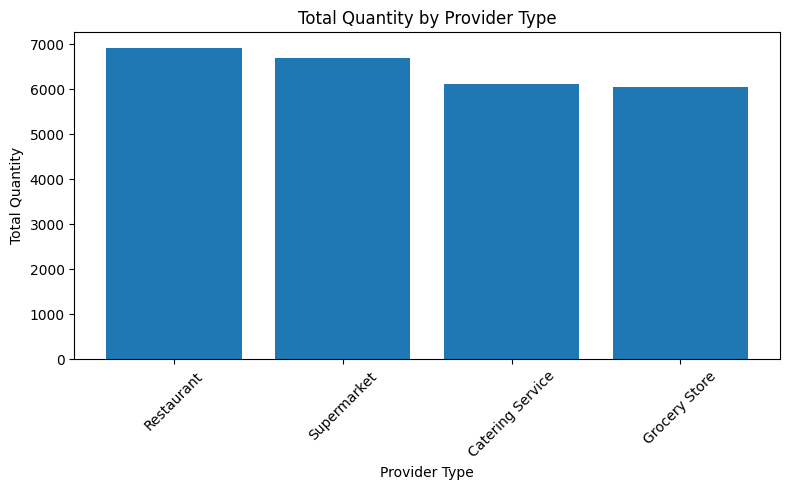

In [41]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(query2_df["Provider Type"], query2_df["Total Quantity"])
plt.xlabel("Provider Type")
plt.ylabel("Total Quantity")
plt.title("Total Quantity by Provider Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
query2_df.to_csv("Queries/query2_df.csv", index=False)

#### Query 3

In [43]:
# What is the contact information of food providers in a specific city?

City = 'New Carol'
query3 = f"select Name, Contact from providers where City='{City}';"

cursor.execute(query3)
query3_result = cursor.fetchall()

In [44]:
query3_df = pd.DataFrame(query3_result, columns=["Name", "Contact"])

In [45]:
query3_df

,Name,Contact
0,Bradford-Martinez,199.451.0254
1,Hammond LLC,001-324-482-4894
2,Hill-Russell,075.630.9218


In [46]:
query3_df.to_csv("Queries/query3_df.csv", index=False)

#### Query 4

In [47]:
# Which receivers have claimed the most food?

query4 = """ select r.Receiver_ID, r.Name, count(c.Claim_ID) as No_of_Claims
from receivers as r
join claims as c
on r.Receiver_ID = c.Receiver_ID
where c.Status = 'Completed'
group by r.Name, r.Receiver_ID
order by No_of_Claims desc; """

cursor.execute(query4)
query4_result = cursor.fetchall()

In [48]:
query4_df = pd.DataFrame(query4_result, columns=["Receiver ID", "Name", "No of Claims"])

In [49]:
query4_df

,Receiver ID,Name,No of Claims
0,45,Derek Potter,3
1,505,Alexandra Owens,3
2,482,Timothy Garrett,3
3,729,David Spence,2
4,601,Peter Gonzalez,2
...,...,...,...
288,553,Scott Proctor,1
289,113,Jonathan Young,1
290,875,Scott Smith,1
291,394,Kyle Kerr,1


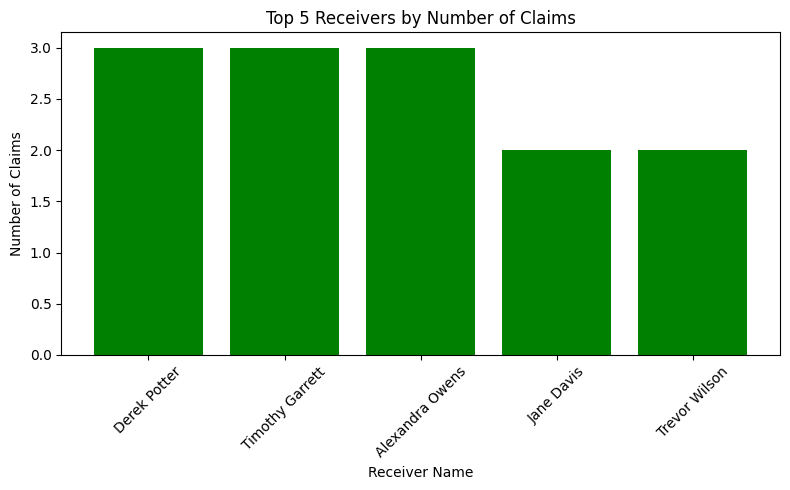

In [50]:
# Plot

top5_receivers = query4_df.sort_values(by="No of Claims", ascending=False).head(5)

plt.figure(figsize=(8, 5))
plt.bar(top5_receivers["Name"], top5_receivers["No of Claims"], color="green")
plt.xlabel("Receiver Name")
plt.ylabel("Number of Claims")
plt.title("Top 5 Receivers by Number of Claims")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
query4_df.to_csv("Queries/query4_df.csv", index=False)

#### Query 5

In [52]:
# What is the total quantity of food available from all providers?

query5_1 = """
select p.Provider_ID, p.Name, sum(f.Quantity) as Total_Quantity
from providers as p
join food_listings as f
on p.Provider_ID = f.Provider_ID
group by p.Provider_ID, p.Name
order by Total_Quantity desc
"""

query5_2 = """
select sum(Quantity) as Total_Quantity_Available from food_listings;
"""

cursor.execute(query5_1)
query5_1_result = cursor.fetchall()

cursor.execute(query5_2)
query5_2_result = cursor.fetchall()

In [53]:
query5_1_df = pd.DataFrame(query5_1_result, columns=["Provider ID", "Name", "Total Quantity"])
query5_2_df = pd.DataFrame(query5_2_result, columns=["Total Quantity Available"])

In [54]:
query5_1_df

,Provider ID,Name,Total Quantity
0,709,Barry Group,179
1,306,"Evans, Wright and Mitchell",158
2,655,Smith Group,150
3,315,Nelson LLC,142
4,678,Ruiz-Oneal,140
...,...,...,...
632,258,Gonzales-Moore,1
633,184,Norris-Townsend,1
634,849,Brown and Sons,1
635,870,Mcgee PLC,1


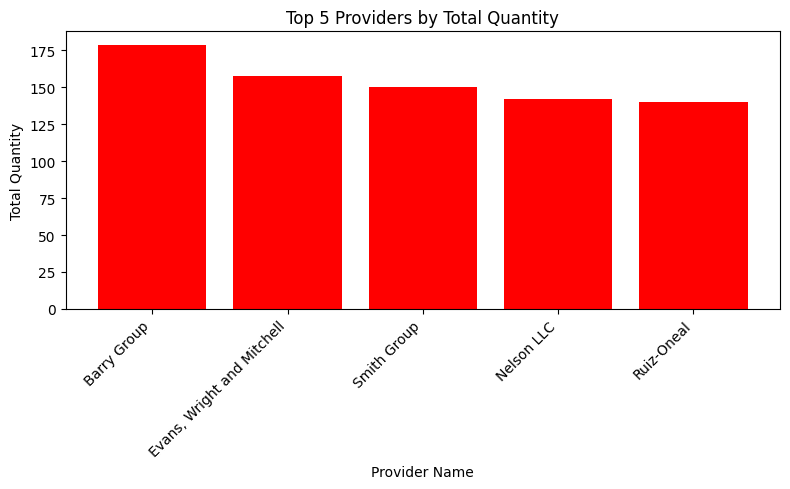

In [55]:
# Plot

top5_providers = query5_1_df.sort_values(by="Total Quantity", ascending=False).head(5)

plt.figure(figsize=(8, 5))
plt.bar(top5_providers["Name"], top5_providers["Total Quantity"], color="red")
plt.xlabel("Provider Name")
plt.ylabel("Total Quantity")
plt.title("Top 5 Providers by Total Quantity")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [56]:
query5_2_df

,Total Quantity Available
0,25794


In [57]:
query5_1_df.to_csv("Queries/query5_1_df.csv", index=False)
query5_2_df.to_csv("Queries/query5_2_df.csv", index=False)

#### Query 6

In [58]:
#  Which city has the highest number of food listings?

query6 = """
select Location, count(*) as Total_Listing
from food_listings group by Location
order by Total_Listing desc
limit 1
"""

cursor.execute(query6)
query6_result = cursor.fetchall()

In [59]:
query6_df = pd.DataFrame(query6_result, columns=["Location", "Total Listing"])

In [60]:
query6_df

,Location,Total Listing
0,New Carol,6


In [61]:
query6_df.to_csv("Queries/query6_df.csv", index=False)

#### Query 7

In [62]:
# What are the most commonly available food types?

query7 = """
select Food_Type, count(*) as Total_Listing
from food_listings group by Food_Type
order by Total_Listing desc
"""

cursor.execute(query7)
query7_result = cursor.fetchall()

In [63]:
query7_df = pd.DataFrame(query7_result, columns=["Food Type", "Total Listing"])

In [64]:
query7_df

,Food Type,Total Listing
0,Vegetarian,336
1,Vegan,334
2,Non-Vegetarian,330


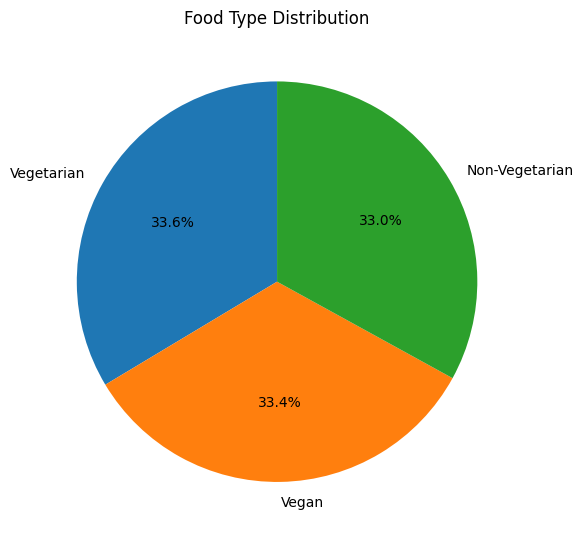

In [65]:
# Plot

plt.figure(figsize=(6, 6))
plt.pie(
    query7_df["Total Listing"],
    labels=query7_df["Food Type"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Food Type Distribution")
plt.tight_layout()
plt.show()

In [66]:
query7_df.to_csv("Queries/query7_df.csv", index=False)

#### Query 8

In [67]:
# How many food claims have been made for each food item?

query8 = """
select f.Food_ID, f.Food_Name, count(c.Claim_ID) as Claim_Count
from claims as c join food_listings as f
on f.Food_ID = c.Food_ID
group by Food_ID
order by Claim_Count desc;
"""

cursor.execute(query8)
query8_result = cursor.fetchall()

In [68]:
query8_df = pd.DataFrame(query8_result, columns=["Food ID", "Food Name", "Claim Count"])

In [69]:
query8_df

,Food ID,Food Name,Claim Count
0,463,Soup,5
1,486,Chicken,5
2,548,Fish,5
3,35,Rice,4
4,92,Chicken,4
...,...,...,...
642,990,Pasta,1
643,992,Salad,1
644,995,Rice,1
645,998,Fruits,1


In [70]:
query8_df.to_csv("Queries/query8_df.csv", index=False)

#### Query 9

In [71]:
# Which provider has had the highest number of successful food claims?

query9 = """
select p.Provider_ID, p.Name, count(c.Claim_ID) as Successful_Claims
from claims as c
join food_listings as f on c.Food_ID = f.Food_ID
join providers as p on f.Provider_ID = p.Provider_ID
where c.Status = 'Completed'
group by p.Provider_ID, p.Name
order by Successful_Claims desc
limit 1
"""

cursor.execute(query9)
query9_result = cursor.fetchall()

In [72]:
query9_df = pd.DataFrame(query9_result, columns=["Provider ID", "Provider Name", "Successful Claims"])

In [73]:
query9_df

,Provider ID,Provider Name,Successful Claims
0,709,Barry Group,5


In [74]:
query9_df.to_csv("Queries/query9_df.csv", index=False)

#### Query 10

In [75]:
#  What percentage of food claims are completed vs. pending vs. canceled?

query10 = """
select Status, (count(*) / (select count(*) from claims)) * 100 as Percentage
from claims
group by Status
order by Percentage desc
"""

cursor.execute(query10)
query10_result = cursor.fetchall()

In [76]:
query10_df = pd.DataFrame(query10_result, columns=["Status", "Percentage"])

In [77]:
query10_df

,Status,Percentage
0,Completed,33.9000
1,Cancelled,33.6000
2,Pending,32.5000


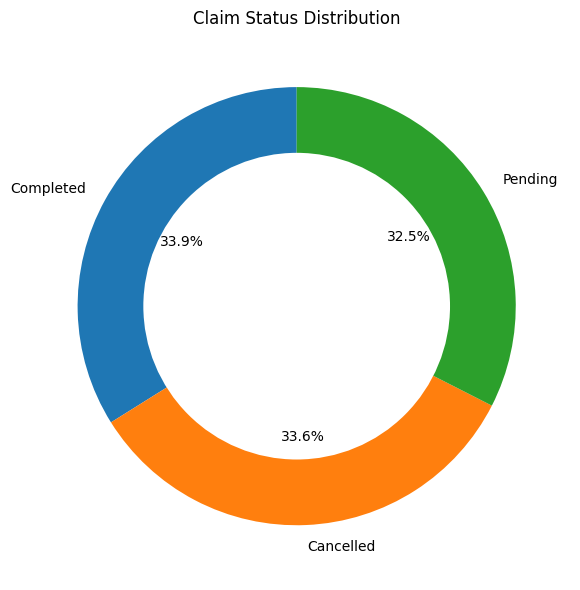

In [78]:
# Plot

labels = query10_df["Status"]
sizes = query10_df["Percentage"]

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops=dict(width=0.4)
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Claim Status Distribution")
plt.tight_layout()
plt.show()


In [79]:
query10_df.to_csv("Queries/query10_df.csv", index=False)

#### Query 11

In [80]:
# What is the average quantity of food claimed per receiver?

query11 = """
select r.Receiver_ID, r.Name, avg(f.Quantity) as Avg_Quantity
from receivers as r
join claims as c on r.Receiver_ID = c.Receiver_ID
join food_listings as f on f.Food_ID = c.Food_ID
group by r.Receiver_ID, r.Name
order by Avg_Quantity desc
"""

cursor.execute(query11)
query11_result = cursor.fetchall()

In [81]:
query11_df = pd.DataFrame(query11_result, columns=["Receiver ID", "Receiver Name", "Average Quantity"])

In [82]:
query11_df

,Receiver ID,Receiver Name,Average Quantity
0,739,Nancy Jones,50.0000
1,282,Lisa Pitts,50.0000
2,616,Christopher Wright,50.0000
3,99,Nancy Silva,50.0000
4,567,Peggy Knight,50.0000
...,...,...,...
619,766,John Reynolds,2.0000
620,174,Matthew Johnson,2.0000
621,746,Kenneth Barnes,2.0000
622,904,Amanda Kline,1.0000


In [83]:
query11_df.to_csv("Queries/query11_df.csv", index=False)

#### Query 12

In [84]:
# Which meal type (breakfast, lunch, dinner, snacks) is claimed the most?

query12 = """
select f.Meal_Type, count(c.Claim_ID) as Claim_Count
from claims as c
join food_listings as f on c.Food_ID = f.Food_ID
group by f.Meal_Type
order by Claim_Count desc
limit 1
"""

cursor.execute(query12)
query12_result = cursor.fetchall()

In [85]:
query12_df = pd.DataFrame(query12_result, columns=["Meal Type", "Claim Count"])

In [86]:
query12_df

,Meal Type,Claim Count
0,Breakfast,278


In [87]:
query12_df.to_csv("Queries/query12_df.csv", index=False)

#### Query 13

In [88]:
#  What is the total quantity of food donated by each provider?

query13 = """
select p.Provider_ID, p.Name, sum(f.Quantity) as Total_Quantity
from food_listings as f
join providers as p on p.Provider_ID = f.Provider_ID
group by p.Provider_ID, p.Name
order by Total_Quantity desc
"""

cursor.execute(query13)
query13_result = cursor.fetchall()

In [89]:
query13_df = pd.DataFrame(query13_result, columns=["Provider ID", "Provider Name", "Total Quantity"])

In [90]:
query13_df

,Provider ID,Provider Name,Total Quantity
0,709,Barry Group,179
1,306,"Evans, Wright and Mitchell",158
2,655,Smith Group,150
3,315,Nelson LLC,142
4,678,Ruiz-Oneal,140
...,...,...,...
632,258,Gonzales-Moore,1
633,184,Norris-Townsend,1
634,849,Brown and Sons,1
635,870,Mcgee PLC,1


In [91]:
query13_df.to_csv("Queries/query13_df.csv", index=False)

#### Query 14

In [92]:
# Which food items have the highest unclaimed rate?

query14 = """
select f.Food_Name, count(c.Claim_ID) as Unclaim_Count
from food_listings as f
join claims as c on f.Food_ID = c.Food_ID
where Status = 'Cancelled'
group by f.Food_Name
order by Unclaim_Count desc
"""

cursor.execute(query14)
query14_result = cursor.fetchall()

In [93]:
query14_df = pd.DataFrame(query14_result, columns=["Food Name", "Cancelled Claims"])

In [94]:
query14_df

,Food Name,Cancelled Claims
0,Rice,49
1,Salad,40
2,Chicken,40
3,Fish,37
4,Soup,33
5,Pasta,30
6,Dairy,29
7,Bread,28
8,Fruits,25
9,Vegetables,25


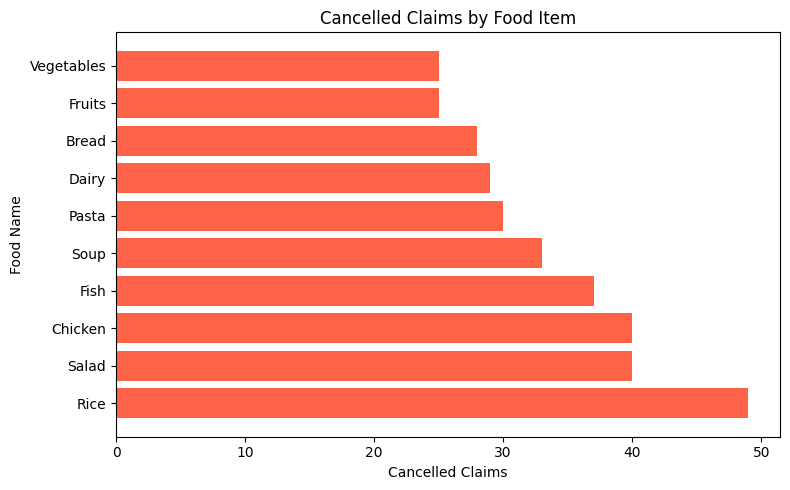

In [95]:
# Plot

plt.figure(figsize=(8, 5))
plt.barh(query14_df["Food Name"], query14_df["Cancelled Claims"], color="tomato")
plt.xlabel("Cancelled Claims")
plt.ylabel("Food Name")
plt.title("Cancelled Claims by Food Item")
plt.tight_layout()
plt.show()

In [96]:
query14_df.to_csv("Queries/query14_df.csv", index=False)

#### Query 15

In [97]:
# How many unique food items does each provider contribute?

query15 = """
select p.Provider_ID, p.Name, count(distinct f.Food_Name) as Unique_Food_Items
from providers p
join food_listings f on p.Provider_ID = f.Provider_ID
group by p.Provider_ID, p.Name
order by Unique_Food_Items desc
"""

cursor.execute(query15)
query15_result = cursor.fetchall()

In [98]:
query15_df = pd.DataFrame(query15_result, columns=["Provider ID", "Provider Name", "Unique Food Items"])

In [99]:
query15_df

,Provider ID,Provider Name,Unique Food Items
0,563,Daniels-Kim,5
1,161,Campbell LLC,4
2,332,Cox LLC,4
3,752,Butler-Richardson,4
4,906,Wright LLC,4
...,...,...,...
632,987,"Harris, Santos and Roberts",1
633,990,Jones PLC,1
634,997,Garza-Williams,1
635,998,Novak Group,1


In [100]:
query15_df.to_csv("Queries/query15_df.csv", index=False)